# Perceptron and Logic Gate

## 1. Perceptron
 - 가설함수: $h(x_1,x_2) = WX = z $
 - activation함수: $act(x) = if: h(X) > \theta{}  then 1, else: 0$
 - A perceptron: $y = act(h(X))$



## 2. Logistic Regression
 - 가설함수: $h(x) = wx+b$
 - logistic함수 (sigmoid): $sigmoid(x) = \frac{1}{1+exp^{-x}}$
 - logistic regression: $y = sigmoid(h(x))$
 - Binary Cross Entropy:
  - 1) 확률함수변형: $P(C=1|x) = y, P(C=0|x) = 1-y, P(C=t|x) = y^{t}(1-y)^{1-t}$
  - 2) likelyhood: $ L(w,b) = \Pi_{i=0}^{n}P(C=t_i|x_i) =  \Pi_{i=0}^{n}y^{t}(1-y)^{1-t} $
  - 3) negative log likely hood: $ \sum_{i=0}^{n}{-tlog{(y)} - (1-t)log{(1-y)}}$
 - parameter update: $ w = w - \alpha{\frac{\partial{Cost(w,b)}}{\partial{w}}} $

## 1. Implimentation of Perceptron

In [8]:
def AND(x1, x2):
  w1, w2, theta = 0.5 , 0.5 , 0.8
  z = w1*x1 + w2*x2

  if z > theta:
    return 1
  else:
    return 0


In [22]:
def NAND(x_1, x_2):
    w_1, w_2, theta = -0.5, -0.5, -0.8
    temp = w_1*x_1 + w_2*x_2
    
    if temp > theta:
        return 1
    else:
        return 0


def OR(x_1, x_2):
    w_1, w_2, theta = 0.5, 0.5, 0.2
    temp = w_1*x_1 + w_2*x_2
    
    if temp > theta:
        return 1
    else:
        return 0

### XOR gate 시각화

In [12]:
import matplotlib.pyplot as plt


(-2.0, 2.0)

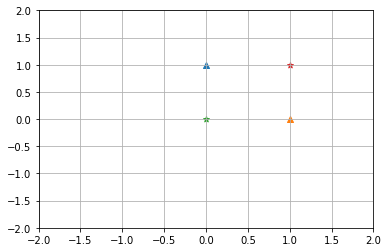

In [21]:
plt.grid()
plt.scatter([0],[1], marker='^')
plt.scatter([1],[0], marker='^')
plt.scatter([0],[0], marker='*')
plt.scatter([1],[1], marker='*')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

### 1-1. XOR를 Perceptron 해결하는 방법
 - Perceptron의 결과를 중첩
 - 1. OR게이트 연산 + NAND 게이트 연산 --> 연산결과값을 2. AND게이트의 입력으로 활용하여 연산

In [23]:
def XOR(x1, x2):
  s1 = OR(x1,x2)
  s2 = NAND(x1,x2)
  y = AND(s1,s2)
  return y

In [27]:
XOR(0,1)

1

## 2. Logistic Regression을 이용해 XOR문제 풀기
 - 기계학습을 이용해 XOR를 해결 할 수 있는 w,b값 찾기
 - 가설함수: $h(x) = wx+b$
 - logistic함수 (sigmoid): $sigmoid(x) = \frac{1}{1+exp^{-x}}$
 - logistic regression: $y = sigmoid(h(x))$
 - Binary Cross Entropy:
  - 1) 확률함수변형: $P(C=1|x) = y, P(C=0|x) = 1-y, P(C=t|x) = y^{t}(1-y)^{1-t}$
  - 2) likelyhood: $ L(w,b) = \Pi_{i=0}^{n}P(C=t_i|x_i) =  \Pi_{i=0}^{n}y^{t}(1-y)^{1-t} $
  - 3) negative log likely hood: $ \sum_{i=0}^{n}{-tlog{(y)} - (1-t)log{(1-y)}}$
 - parameter update: $ w = w - \alpha{\frac{\partial{Cost(w,b)}}{\partial{w}}} $

In [28]:
import numpy as np

# sigmoid 함수
def sigmoid(x):
    return 1 / (1+np.exp(-x))

# 수치미분 함수
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [90]:
class LogicGate:
  def __init__(self, gateName, xdata, tdata): #[ [0, 0], [0, 1], [1, 0], [1, 1] ],     AND [0, 0, 0, 1],   OR [0, 1, 1, 1], XOR [1, 1, 1, 0]
      self.name = gateName

      self.__xdata = xdata.reshape(4,2)
      self.__tdata = tdata.reshape(4,1)

      self.__W = np.random.rand(2, 1)
      self.__b = np.random.rand(1)

      self.__learning_rate = 1e-2

  def __loss_func(self):

      delta = 1e-7
      z = np.dot(self.__xdata, self.__W) + self.__b
      y = sigmoid(z)

      return -np.sum(self.__tdata*np.log(y+delta) + (1-self.__tdata) * np.log((1-y)+delta))

  def loss_val(self):
      delta = 1e-7
      z = np.dot(self.__xdata, self.__W) + self.__b
      y = sigmoid(z)

      return -np.sum(self.__tdata*np.log(y+delta) + (1-self.__tdata) * np.log((1-y)+delta))

  def train(self):
      f = lambda x: self.__loss_func()

      for idx in range(2000):

        self.__W = self.__W - self.__learning_rate * numerical_derivative(f, self.__W)
        self.__b = self.__b - self.__learning_rate * numerical_derivative(f, self.__b)

        loss = self.loss_val()


        print("EPOCH: ", idx, "loss: ", loss, "PARAMETERS", self.__W, self.__b)

  def predict(self, input_data):
      z = np.dot(input_data, self.__W) + self.__b
      y = sigmoid(z) # 0~1

      if y >= 0.5:
        return 1, y
      else: 
        return 0, y




In [91]:
input_data = np.array([ 
                [0, 0], 
                [0, 1], 
                [1, 0], 
                [1, 1] 
                ])

In [92]:
## AND gate
target_data = np.array([0,0,0,1])

In [93]:
AND_obj = LogicGate("AND_gate", input_data, target_data)

In [94]:
AND_obj.train()

EPOCH:  0 loss:  4.3238343012060465 PARAMETERS [[0.48042528]
 [0.50586908]] [0.76507492]
EPOCH:  1 loss:  4.272435950197232 PARAMETERS [[0.47413883]
 [0.49953879]] [0.74419263]
EPOCH:  2 loss:  4.2220219406919 PARAMETERS [[0.46794259]
 [0.49329812]] [0.72349305]
EPOCH:  3 loss:  4.1725877378398035 PARAMETERS [[0.46183731]
 [0.48714784]] [0.70297707]
EPOCH:  4 loss:  4.12412812086476 PARAMETERS [[0.45582369]
 [0.48108865]] [0.68264548]
EPOCH:  5 loss:  4.07663719842444 PARAMETERS [[0.44990237]
 [0.4751212 ]] [0.66249897]
EPOCH:  6 loss:  4.030108425863917 PARAMETERS [[0.44407393]
 [0.46924611]] [0.64253814]
EPOCH:  7 loss:  3.9845346242525306 PARAMETERS [[0.43833892]
 [0.46346391]] [0.6227635]
EPOCH:  8 loss:  3.93990800108812 PARAMETERS [[0.43269781]
 [0.45777511]] [0.60317545]
EPOCH:  9 loss:  3.8962201725425163 PARAMETERS [[0.42715103]
 [0.45218014]] [0.58377432]
EPOCH:  10 loss:  3.853462187111798 PARAMETERS [[0.42169895]
 [0.44667938]] [0.5645603]
EPOCH:  11 loss:  3.81162455053401

In [104]:
test_data = np.array([[1,1]])
result, sigOut = AND_obj.predict(test_data)

In [105]:
result

1

In [106]:
sigOut

array([[0.75371166]])

### 2-2. OR gate

In [137]:
target_data = np.array([0,1,1,1])

OR_obj = LogicGate("OR_gate", input_data, target_data)

In [138]:
OR_obj.train()

EPOCH:  0 loss:  2.1991858193737843 PARAMETERS [[0.02315575]
 [0.30347718]] [0.43203973]
EPOCH:  1 loss:  2.1883383145192687 PARAMETERS [[0.03022636]
 [0.30990638]] [0.43622649]
EPOCH:  2 loss:  2.1777404531372175 PARAMETERS [[0.03723197]
 [0.31627407]] [0.4403159]
EPOCH:  3 loss:  2.167384200891506 PARAMETERS [[0.04417377]
 [0.32258143]] [0.44430981]
EPOCH:  4 loss:  2.1572618080323847 PARAMETERS [[0.05105291]
 [0.32882958]] [0.44821001]
EPOCH:  5 loss:  2.1473657992607387 PARAMETERS [[0.05787054]
 [0.33501965]] [0.45201828]
EPOCH:  6 loss:  2.1376889638945356 PARAMETERS [[0.06462775]
 [0.34115272]] [0.45573634]
EPOCH:  7 loss:  2.1282243463367174 PARAMETERS [[0.07132565]
 [0.34722986]] [0.45936587]
EPOCH:  8 loss:  2.118965236842056 PARAMETERS [[0.07796529]
 [0.35325211]] [0.46290854]
EPOCH:  9 loss:  2.109905162580179 PARAMETERS [[0.08454772]
 [0.35922049]] [0.46636598]
EPOCH:  10 loss:  2.101037878990807 PARAMETERS [[0.09107397]
 [0.36513601]] [0.46973975]
EPOCH:  11 loss:  2.09235

In [139]:
test_data = np.array([[0,0]])
result, sigOut = OR_obj.predict(test_data)

In [140]:
result

0

### 2-3. NAND

In [141]:
target_data = np.array([1,1,1,0])

NAND_obj = LogicGate("NAND_gate", input_data, target_data)

In [142]:
NAND_obj.train()

EPOCH:  0 loss:  3.0043213149109063 PARAMETERS [[0.49840501]
 [0.71817197]] [0.09339681]
EPOCH:  1 loss:  2.998903934562146 PARAMETERS [[0.49409215]
 [0.71337245]] [0.09696159]
EPOCH:  2 loss:  2.9935040959735613 PARAMETERS [[0.48979029]
 [0.70858486]] [0.1005311]
EPOCH:  3 loss:  2.988121717197748 PARAMETERS [[0.4854994 ]
 [0.70380914]] [0.10410522]
EPOCH:  4 loss:  2.982756717044799 PARAMETERS [[0.48121941]
 [0.69904525]] [0.10768387]
EPOCH:  5 loss:  2.977409015072099 PARAMETERS [[0.47695028]
 [0.69429313]] [0.11126695]
EPOCH:  6 loss:  2.9720785315739864 PARAMETERS [[0.47269196]
 [0.68955274]] [0.11485436]
EPOCH:  7 loss:  2.966765187571837 PARAMETERS [[0.46844438]
 [0.68482403]] [0.11844601]
EPOCH:  8 loss:  2.9614689048038016 PARAMETERS [[0.46420751]
 [0.68010693]] [0.12204181]
EPOCH:  9 loss:  2.9561896057148314 PARAMETERS [[0.45998129]
 [0.67540141]] [0.12564166]
EPOCH:  10 loss:  2.9509272134469517 PARAMETERS [[0.45576567]
 [0.67070742]] [0.12924547]
EPOCH:  11 loss:  2.945681

In [145]:
test_data = np.array([[1,1]])
result, sigOut = NAND_obj.predict(test_data)

In [146]:
result

0

### 2-4. XOR gate

In [147]:
target_data = np.array([0,1,1,0])

XOR_obj = LogicGate("XOR_gate", input_data, target_data)

In [148]:
XOR_obj.train()

EPOCH:  0 loss:  2.9812503975067437 PARAMETERS [[0.05348116]
 [0.64803303]] [0.21878838]
EPOCH:  1 loss:  2.97581683466245 PARAMETERS [[0.05065362]
 [0.64384116]] [0.21340521]
EPOCH:  2 loss:  2.970529984337963 PARAMETERS [[0.04787158]
 [0.63969461]] [0.20810055]
EPOCH:  3 loss:  2.965386291938099 PARAMETERS [[0.04513455]
 [0.63559299]] [0.20287354]
EPOCH:  4 loss:  2.960382264583618 PARAMETERS [[0.04244201]
 [0.63153589]] [0.1977233]
EPOCH:  5 loss:  2.9555144713491233 PARAMETERS [[0.03979347]
 [0.62752291]] [0.19264897]
EPOCH:  6 loss:  2.950779543416158 PARAMETERS [[0.03718843]
 [0.62355365]] [0.18764968]
EPOCH:  7 loss:  2.946174174146055 PARAMETERS [[0.0346264]
 [0.6196277]] [0.18272456]
EPOCH:  8 loss:  2.9416951190759786 PARAMETERS [[0.03210687]
 [0.61574464]] [0.17787276]
EPOCH:  9 loss:  2.9373391958422514 PARAMETERS [[0.02962934]
 [0.61190407]] [0.17309341]
EPOCH:  10 loss:  2.9331032840350204 PARAMETERS [[0.02719332]
 [0.60810556]] [0.16838565]
EPOCH:  11 loss:  2.9289843249

In [155]:
test_data = np.array([[0,1]])
result, sigOut = XOR_obj.predict(test_data)

In [156]:
result

1

### 2-5. 중첩된 Logistic Regression을 이용한 XOR해결

In [158]:
def XOR_logist(xor_input_data):

  s1, nan_sig = NAND_obj.predict(xor_input_data)
  s2, or_sig = OR_obj.predict(xor_input_data)
  new_data = np.array([[s1,s2]])
  y, xor_sig = AND_obj.predict(new_data)
  return y

In [166]:
test_data = np.array([[0,0]])
result = XOR_logist(test_data)

In [167]:
result

0